# Figure 2: Planetary Pairs with Measured Masses Plot

## 1. Notebook Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

## 2. Import Data

The data is stored in a CSV file named `planets.csv` found in the data folder.

In [2]:
# Read in data
planets = pd.read_csv('../data/planets.csv', header=0)

## 3. Organize Data

In [3]:
# Select objects with identified masses
withmass = planets[planets['env mass flag']==0]

In [4]:
# Bin objects by stellar effective temperature
#Planets are separated into those orbiting stars with effective temps below 4700 K and those above 4700 K
#We make this distinction to reflect our choice that the location of the radius valley changes 
#from 1.6 Rearth around cooler stars to 1.8 Rearth around Sun-like stars

bin1=withmass['star temp']<=3900

bin2=(withmass['star temp']<=4550) & (withmass['star temp']>3900)

bin3=(withmass['star temp']<=4700) & (withmass['star temp']>4550)

bin4=(withmass['star temp']<=4900) & (withmass['star temp']>4700)

bin5=(withmass['star temp']<=5700) & (withmass['star temp']>4900)

bin6=(withmass['star temp']<=6400) & (withmass['star temp']>5700)

bins = [bin1,bin2,bin3,bin4,bin5,bin6]

In [5]:
# Bin stars
stars = {}
for ind,bin in enumerate(bins):
    stars[f'bin{ind+1}'] = list(withmass['star temp'][bin])

## 4. Plot Figure 2

In [6]:
def plot_bin(ax,star_df,star,legend=False):
    # Mask dataframe based on stellar bin
    sys_stars = star_df['star temp'] == star
    # Identify planet properties based on bin
    rockyrad = list(star_df['rocky rad'][sys_stars])
    envrad = list(star_df['env rad'][sys_stars])
    rockyperiod = list(star_df['rocky period'][sys_stars])
    envperiod = list(star_df['env period'][sys_stars])

    # Plot dotted lines and points
    for i in range(len(rockyrad)): 
        for j in range(len(rockyrad)):
            ax.plot((rockyperiod[i], envperiod[j]), (rockyrad[i], envrad[j]), color='gray', linestyle='--')
            ax.plot(rockyperiod[i], rockyrad[i],  marker='o', markersize=10,color='blue')
            ax.plot(envperiod[j], envrad[j], marker='o', markersize=10,color='orange')

    # Plot a legend
    if legend and ax.get_legend() is None:
        ax.plot(rockyperiod[0], rockyrad[0], marker='o', markersize=10,color='blue', label='Rocky')
        ax.plot(envperiod[0], envrad[0], marker='o', markersize=10,color='orange', label='Enveloped')
        ax.legend(loc='upper left', fontsize='x-large') 

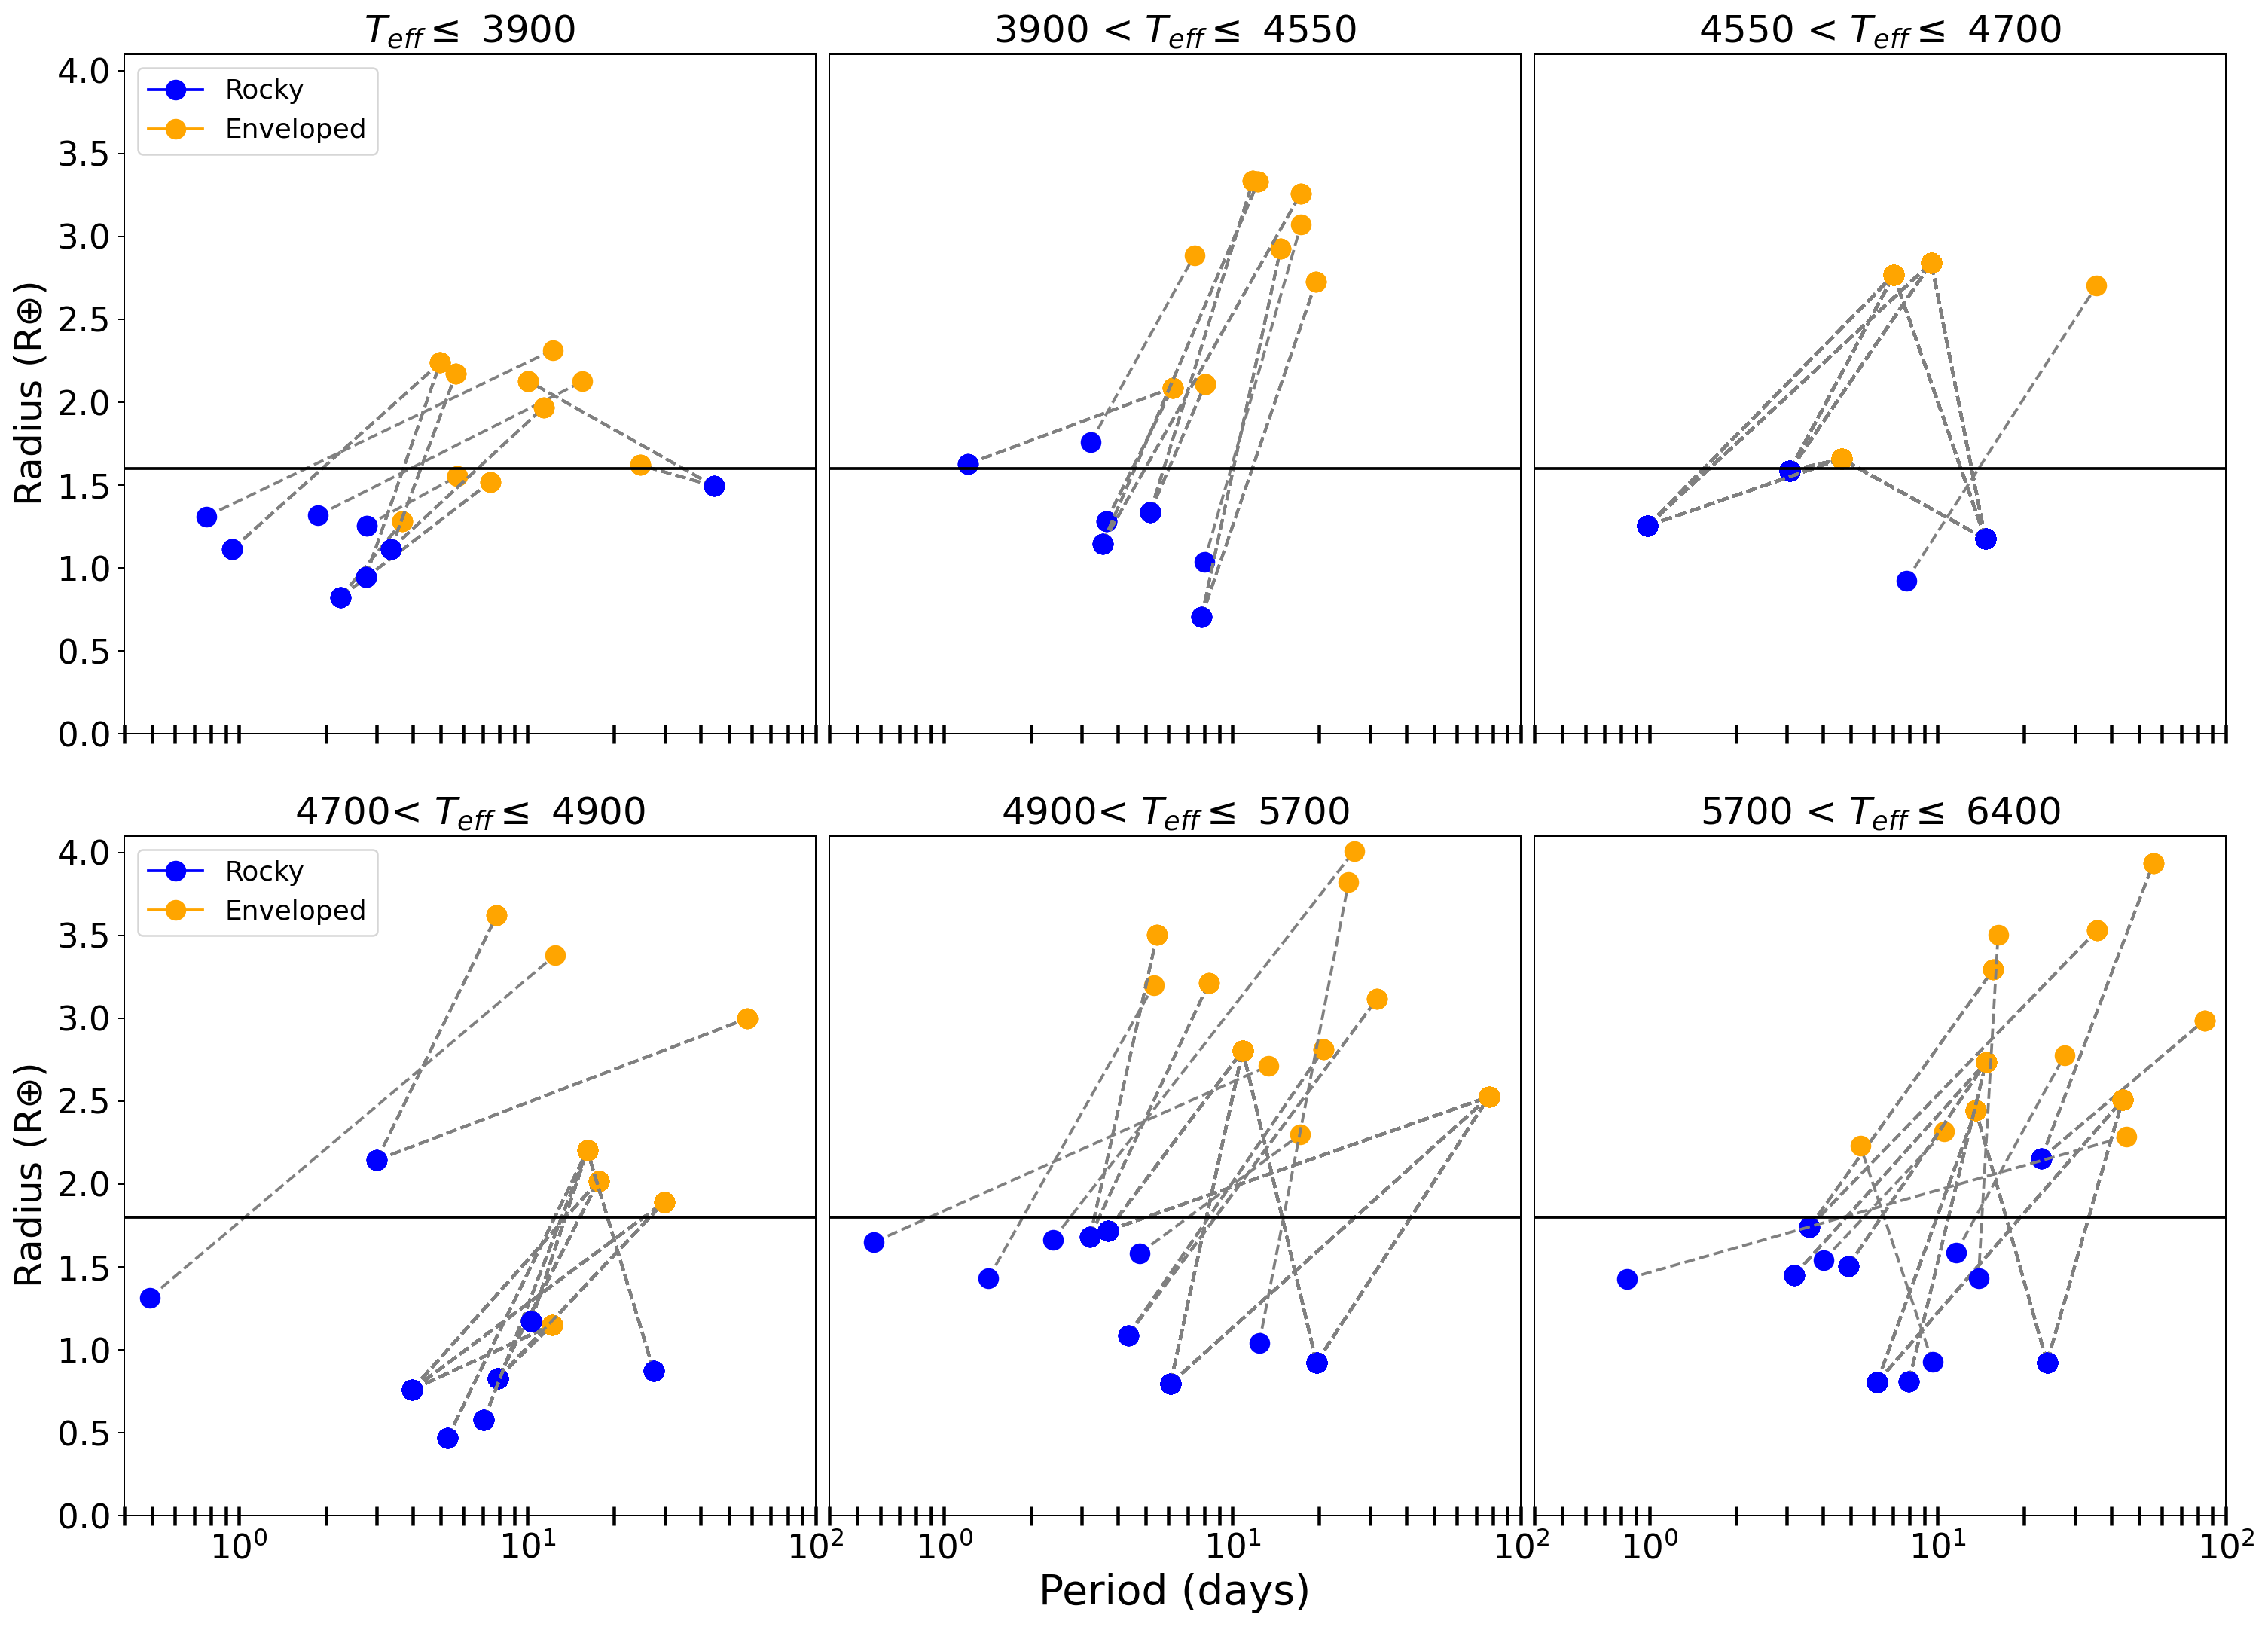

In [7]:
# Setup the figure and axes
fig,axes = plt.subplots(2,3,figsize=(20,14),dpi=180., facecolor='white', sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.15, wspace=0.02)

# For each binned group of stars
for i in range(len(bins)):
    # Loop through and plot all planets associated with that planetary system
    for star in stars[f'bin{i+1}']: plot_bin(fig.axes[i],withmass,star,legend=i%3==0)

# Loop through each vertical axis
for y,axis in enumerate(axes):
    # Loop through each horizontal axis
    for x,ax in enumerate(axis):
        # Set plot information for each subplot
        ax.set_xscale('log')
        ax.set_facecolor('white')
        ax.set_xlim(0.4,100)
        ax.set_ylim(0, 4.1)
        ax.tick_params('x',which='both', direction='inout', width=1.8, length=10, labelsize=18)

        # Set labels and tick params for leftmost subplots
        if x == 0:
            ax.set_ylabel(r'Radius (R$\oplus$)', fontsize=20)
            ax.tick_params('y', labelsize=18)
        else: 
            ax.tick_params('y', left=False)

        # Plot horizontal lines
        if y == 0: 
            ax.hlines(1.6, 0, 100, color='k')  #line showing our location of the radius valley
        else: 
            ax.hlines(1.8, 0, 100, color='k')  #line showing our location of the radius valley

# Set subplot titles
axes[0,0].set_title(r'$T_{eff}\leq$ 3900', fontsize=20)
axes[0,1].set_title(r'3900 < $T_{eff} \leq$ 4550', fontsize=20)
axes[0,2].set_title(r'4550 < $T_{eff} \leq$ 4700', fontsize=20)
axes[1,0].set_title(r'4700< $T_{eff} \leq$ 4900', fontsize=20)
axes[1,1].set_title(r'4900< $T_{eff} \leq$ 5700', fontsize=20)
axes[1,1].set_xlabel('Period (days)', fontsize=22)
axes[1,2].set_title(r'5700 < $T_{eff} \leq$ 6400', fontsize=20)

# Save the figure
plt.savefig('../figures/Figure 2.png', dpi=180., bbox_inches='tight')